In [1]:
import numpy as np
import scipy
import random
import pandas as pd
import seaborn as sns
import matplotlib
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import SpectralEmbedding
from sklearn.decomposition import FastICA
from sklearn.manifold import TSNE 
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
#from fcmeans import FCM
from sklearn.mixture import GaussianMixture
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import f_classif
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
#from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import sklearn

In [2]:
import pathlib

## Prepare data 

In [3]:
df = pd.read_csv(pathlib.Path('..', 'data','USCensus1990.data.csv'))

dAge = df['dAge']
dHispanic = df['dHispanic']
iYearwrk = df['iYearwrk']
iSex = df['iSex']

del(df['caseid'],df['dAge'],df['dHispanic'],df['iYearwrk'],df['iSex'])
df

,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,iEnglish,iFeb55,...,iSubfam2,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,dYrsserv
0,0,1,0,0,5,3,2,2,1,0,...,0,0,5,0,2,1,1,0,11,0
1,1,1,0,0,7,5,2,2,0,0,...,0,0,1,0,2,1,1,0,5,0
2,1,2,0,0,7,4,2,2,0,0,...,0,0,2,0,2,1,1,0,10,0
3,1,2,0,0,1,3,2,2,0,0,...,0,0,1,0,1,1,1,0,10,0
4,1,1,0,0,0,0,2,2,0,0,...,0,3,0,0,0,2,2,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458280,1,2,0,0,0,0,2,2,0,0,...,0,3,0,0,0,2,2,1,7,1
2458281,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0
2458282,3,1,0,0,1,2,2,2,1,0,...,0,0,5,0,2,1,1,0,11,0
2458283,0,1,0,0,1,3,2,2,0,0,...,0,0,1,0,2,1,1,0,10,0


In [4]:
df.info()
df.dropna(inplace=True)
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2458285 entries, 0 to 2458284
Data columns (total 64 columns):
 #   Column     Dtype
---  ------     -----
 0   dAncstry1  int64
 1   dAncstry2  int64
 2   iAvail     int64
 3   iCitizen   int64
 4   iClass     int64
 5   dDepart    int64
 6   iDisabl1   int64
 7   iDisabl2   int64
 8   iEnglish   int64
 9   iFeb55     int64
 10  iFertil    int64
 11  dHour89    int64
 12  dHours     int64
 13  iImmigr    int64
 14  dIncome1   int64
 15  dIncome2   int64
 16  dIncome3   int64
 17  dIncome4   int64
 18  dIncome5   int64
 19  dIncome6   int64
 20  dIncome7   int64
 21  dIncome8   int64
 22  dIndustry  int64
 23  iKorean    int64
 24  iLang1     int64
 25  iLooking   int64
 26  iMarital   int64
 27  iMay75880  int64
 28  iMeans     int64
 29  iMilitary  int64
 30  iMobility  int64
 31  iMobillim  int64
 32  dOccup     int64
 33  iOthrserv  int64
 34  iPerscare  int64
 35  dPOB       int64
 36  dPoverty   int64
 37  dPwgt1     int64
 38  iR

,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,iEnglish,iFeb55,...,iSubfam2,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,dYrsserv
0,0,1,0,0,5,3,2,2,1,0,...,0,0,5,0,2,1,1,0,11,0
1,1,1,0,0,7,5,2,2,0,0,...,0,0,1,0,2,1,1,0,5,0
2,1,2,0,0,7,4,2,2,0,0,...,0,0,2,0,2,1,1,0,10,0
3,1,2,0,0,1,3,2,2,0,0,...,0,0,1,0,1,1,1,0,10,0
4,1,1,0,0,0,0,2,2,0,0,...,0,3,0,0,0,2,2,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458280,1,2,0,0,0,0,2,2,0,0,...,0,3,0,0,0,2,2,1,7,1
2458281,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0
2458282,3,1,0,0,1,2,2,2,1,0,...,0,0,5,0,2,1,1,0,11,0
2458283,0,1,0,0,1,3,2,2,0,0,...,0,0,1,0,2,1,1,0,10,0


## Feature Engineering 

In [5]:
!pip install git+https://github.com/MaxHalford/prince.git > /dev/null

  Running command git clone --filter=blob:none -q https://github.com/MaxHalford/prince.git /tmp/pip-req-build-qaq36ht8
You should consider upgrading via the '/home/maayan/anaconda3/envs/data-science/bin/python -m pip install --upgrade pip' command.


In [5]:
import prince

In [11]:
def sample_reduce(df, frac=0.01, n_components=-1):
    mca = prince.MCA(n_components=-1)
    df_partial = df.sample(frac=frac)
    df_partial_encoded = pd.get_dummies(df_partial, columns=df_partial.columns)
    
    mca = mca.fit(df_partial_encoded)
    df_reduced_partial = mca.transform(df_partial_encoded)
    
    return df_reduced_partial, df_partial_encoded, mca

In [12]:
df_reduced_partial, df_partial, mca = sample_reduce(df)

In [13]:
df_reduced_partial.to_numpy()[:,:2].shape

(24583, 2)

## Clustering 

In [14]:
external_vars = [
    (dAge, 'age'),
    (dHispanic, 'hispanic'),
    (iYearwrk, 'Yearwrk'),
    (iSex, 'sex')
]

### hierarchical clustering 

In [15]:
ac_silhoutte = []

for i in range(2,15):
    print(f'Number of clusters {i}')
    for data, features in [(df_reduced_partial, 'mca'), (df_partial, 'none')]:
        print(f'with {features}')

        features_mat = data.to_numpy()

        for Clstr, name in [(KMeans, 'kmeans'), (AgglomerativeClustering, 'ac')]:#, (SpectralClustering, 'spectral')]:
            print(f'{name}:')
            ac = Clstr(n_clusters=i).fit(features_mat)
            ac_labels = ac.labels_
            silhouette_avg = silhouette_score(features_mat, ac_labels)
            ac_silhoutte.append(silhouette_avg)
            print(
                        "For n_clusters =",
                        i,
                        "The average silhouette_score is :",
                        silhouette_avg,
                )
            unique_counts = np.unique(ac_labels,return_counts=True)
            print(unique_counts)

            for var, var_text in external_vars:
                subset_var = var[df_reduced_partial.index]
                print(f'{var_text}: {mutual_info_score(subset_var, ac_labels)}')
            print('-'*10)
    print('-'*20)

Number of clusters 2
with mca
kmeans:
For n_clusters = 2 The average silhouette_score is : 0.4061934163174103
(array([0, 1], dtype=int32), array([18697,  5886]))
age: 0.00022036166156741074
hispanic: 0.00028980781779857777
Yearwrk: 0.00010460297291446305
sex: 1.5261005534672467e-05
----------
ac:
For n_clusters = 2 The average silhouette_score is : 0.3994952551939476
(array([0, 1]), array([18565,  6018]))
age: 0.0001687691886542858
hispanic: 0.0003255376004784882
Yearwrk: 8.816199717928686e-05
sex: 3.0423676666058164e-05
----------
with none
kmeans:
For n_clusters = 2 The average silhouette_score is : 0.21002973634573582
(array([0, 1], dtype=int32), array([13424, 11159]))
age: 0.00017708881654851516
hispanic: 0.0002302466598146267
Yearwrk: 0.00017138515316675318
sex: 4.814529681218538e-05
----------
ac:
For n_clusters = 2 The average silhouette_score is : 0.21994726325222363
(array([0, 1]), array([18884,  5699]))
age: 0.00021329808477790757
hispanic: 0.0003136781373883086
Yearwrk: 0.00

KeyboardInterrupt: 

In [34]:
mca.explained_inertia_

array([0.81812156, 0.16817931, 0.05912461, 0.03960325, 0.0196856 ,
       0.01280724, 0.01072998, 0.00819294])

In [33]:
df_reduced_partial

,0,1,2,3,4,5,6,7
0,0.495833,-0.168494,0.049065,-0.010263,-0.007207,-0.011967,-0.081546,0.025119
1,-0.288340,-0.079682,-0.087494,-0.184122,0.010882,0.019454,-0.004147,-0.047751
2,0.494035,-0.152176,-0.056567,0.095753,-0.013207,-0.018674,-0.060215,0.006607
3,-0.273452,-0.167986,0.003741,-0.043458,-0.021368,-0.009827,0.032077,0.105237
4,0.075843,0.445370,0.055062,-0.071837,-0.102429,0.114828,0.014433,-0.041868
...,...,...,...,...,...,...,...,...
245823,0.478441,-0.146237,-0.023684,0.025692,0.070138,-0.036020,0.724864,-0.186353
245824,-0.311595,-0.143630,0.045221,-0.062122,-0.125371,0.043735,0.023278,0.105621
245825,0.498395,-0.185442,0.052695,-0.018583,0.008160,-0.008154,-0.078205,0.033765
245826,0.249682,0.195854,-0.147403,-0.000164,0.034631,0.005339,-0.101452,0.052984


### Information gain to trarget variables: 

In [10]:
from sklearn.feature_selection import mutual_info_classif

In [16]:
mutual_info_classif(df_partial, dAge[df_partial.index])

array([0.01633211, 0.01232346, 0.01166453, 0.02176622, 0.35493144,
       0.25920345, 0.51310087, 0.5188294 , 0.00416775, 0.0195204 ,
       0.19566845, 0.33071588, 0.27113788, 0.04686895, 0.31611334,
       0.02013722, 0.00082074, 0.06495749, 0.23512187, 0.0139055 ,
       0.07379798, 0.01237604, 0.36311044, 0.02972524, 0.15830435,
       0.16779415, 0.46719132, 0.00810056, 0.26381132, 0.51597908,
       0.20697542, 0.4935589 , 0.36172063, 0.        , 0.48029969,
       0.0159168 , 0.02345529, 0.00708334, 0.14773037, 0.35283315,
       0.49204609, 0.01047141, 0.47707862, 0.21651307, 0.60029682,
       0.41970396, 0.40429855, 0.04181533, 0.4909425 , 0.69964649,
       0.16691606, 0.3678604 , 0.01604656, 0.03028072, 0.00454486,
       0.15120703, 0.2465179 , 0.04404645, 0.32584003, 0.58163766,
       0.43025049, 0.05055892, 0.5171373 , 0.06100787])

In [11]:
# df.values
# df.values.shape
# df[df.columns.values].values.shape
partial_df = df.sample(frac=0.01)
partial_df.shape
df = partial_df

In [43]:
feature_matrix = sklearn.preprocessing.normalize(df, axis=0)

In [23]:
df

,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,iEnglish,iFeb55,...,iSubfam2,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,dYrsserv
136094,1,1,0,0,0,0,2,2,0,0,...,0,3,0,0,0,2,2,0,10,0
1781067,11,1,0,0,5,0,1,2,0,0,...,0,0,0,0,1,1,1,0,11,1
877298,1,1,0,0,0,0,2,2,0,0,...,0,3,0,0,0,2,2,0,11,0
1072640,3,1,4,0,1,0,1,2,1,0,...,0,3,0,0,1,1,2,0,11,0
1001935,3,1,0,0,1,3,2,2,1,0,...,0,0,3,0,2,1,1,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938871,11,1,0,0,0,0,1,1,0,0,...,0,3,0,0,0,2,2,0,5,0
850736,0,1,0,0,0,0,2,2,0,0,...,0,3,0,0,0,2,2,0,14,0
1160071,1,1,4,0,1,0,1,2,0,0,...,0,3,0,0,1,1,2,0,10,2
1693173,1,12,0,0,1,2,2,2,0,0,...,0,0,4,0,2,1,1,0,10,0


In [44]:
ac_silhoutte = []
for i in range(2,15):
#     ac = AgglomerativeClustering(n_clusters=i).fit(df[df.columns.values].values)
    ac = AgglomerativeClustering(n_clusters=i).fit(feature_matrix)
    ac_labels = ac.labels_
    silhouette_avg = silhouette_score(feature_matrix, ac_labels)
    ac_silhoutte.append(silhouette_avg)
    print(
                "For n_clusters =",
                i,
                "The average silhouette_score is :",
                silhouette_avg,
        )
    unique_counts = np.unique(ac_labels,return_counts=True)
    print(unique_counts)


For n_clusters = 2 The average silhouette_score is : 0.1620839535788347
(array([0, 1]), array([18673,  5910]))
For n_clusters = 3 The average silhouette_score is : 0.19844180420021026
(array([0, 1, 2]), array([ 7455,  5910, 11218]))
For n_clusters = 4 The average silhouette_score is : 0.20764931801772796
(array([0, 1, 2, 3]), array([11218,  5910,  5585,  1870]))
For n_clusters = 5 The average silhouette_score is : 0.2309757315890877
(array([0, 1, 2, 3, 4]), array([5910, 2985, 5585, 1870, 8233]))
For n_clusters = 6 The average silhouette_score is : 0.2524641287166615
(array([0, 1, 2, 3, 4, 5]), array([2985, 8233, 5585, 1870,  608, 5302]))
For n_clusters = 7 The average silhouette_score is : 0.2649884971856821
(array([0, 1, 2, 3, 4, 5, 6]), array([2154, 8233,  831, 1870,  608, 5302, 5585]))
For n_clusters = 8 The average silhouette_score is : 0.2724304214518394
(array([0, 1, 2, 3, 4, 5, 6, 7]), array([1630,  524,  831, 8233,  608, 5302, 5585, 1870]))
For n_clusters = 9 The average silhou

In [8]:
ac_silhoutte = []
for i in range(2,15):
#     ac = AgglomerativeClustering(n_clusters=i).fit(df[df.columns.values].values)
    ac = AgglomerativeClustering(n_clusters=i).fit(df.values)
    ac_labels = ac.labels_
    silhouette_avg = silhouette_score(df[df.columns.values].values, ac_labels)
    ac_silhoutte.append(silhouette_avg)
    print(
                "For n_clusters =",
                i,
                "The average silhouette_score is :",
                silhouette_avg,
        )
    unique_counts = np.unique(ac_labels,return_counts=True)
    print(unique_counts)


For n_clusters = 2 The average silhouette_score is : 0.8067666173532942
(array([0, 1], dtype=int64), array([ 6176, 18407], dtype=int64))
For n_clusters = 3 The average silhouette_score is : 0.830047865536938
(array([0, 1, 2], dtype=int64), array([18407,  4664,  1512], dtype=int64))
For n_clusters = 4 The average silhouette_score is : 0.6420981736801666
(array([0, 1, 2, 3], dtype=int64), array([16738,  4664,  1512,  1669], dtype=int64))
For n_clusters = 5 The average silhouette_score is : 0.41532500588830384
(array([0, 1, 2, 3, 4], dtype=int64), array([ 4664, 10671,  1512,  1669,  6067], dtype=int64))
For n_clusters = 6 The average silhouette_score is : 0.3768969451601974
(array([0, 1, 2, 3, 4, 5], dtype=int64), array([10671,  6067,  1512,  1669,  4442,   222], dtype=int64))
For n_clusters = 7 The average silhouette_score is : 0.3431966867596617
(array([0, 1, 2, 3, 4, 5, 6], dtype=int64), array([6067, 4442, 1512, 1669, 6660,  222, 4011], dtype=int64))
For n_clusters = 8 The average silh

In [36]:
ac = AgglomerativeClustering(n_clusters=9).fit(df[df.columns.values].values)
ac_labels = ac.labels_
df[ac_labels] = ac_labels

In [35]:
print(ac_labels.shape)
col = 'dAncstry1'
print(df[col])

(24583,)
2395629     2
603243     11
269554      1
2348524     1
365199      1
           ..
730940      1
863773      1
1082167     0
1468799     1
1277346     1
Name: dAncstry1, Length: 24583, dtype: int64


In [38]:
for col in df.columns:
    correlation = df[col].corr(df[ac_labels])
    print(correlation)

-0.02317045087341343
0.006888349610848632
-0.015862196311274727
-0.016669578619929168
-0.07636881366372343
-0.07690109299473297
-0.16668056137426004
-0.17106651614360918
-0.027071032127864478
-0.01521959152921723
-0.06527983120448004
-0.09666616489989922
-0.08542436030840593
-0.03223523197411386
-0.07958129709345726
-0.027608610667904297
-0.014991514437512394
-0.05105900050156967
-0.035479138335336724
-0.0269267821644019
-0.028295859288901513
-0.015006515149561842
-0.10455168647238669


KeyboardInterrupt: 

In [10]:
tsne = TSNE(n_components = 2)
tsne_result = tsne.fit_transform(df.values)

<AxesSubplot:xlabel='tsne-one', ylabel='tsne-two'>

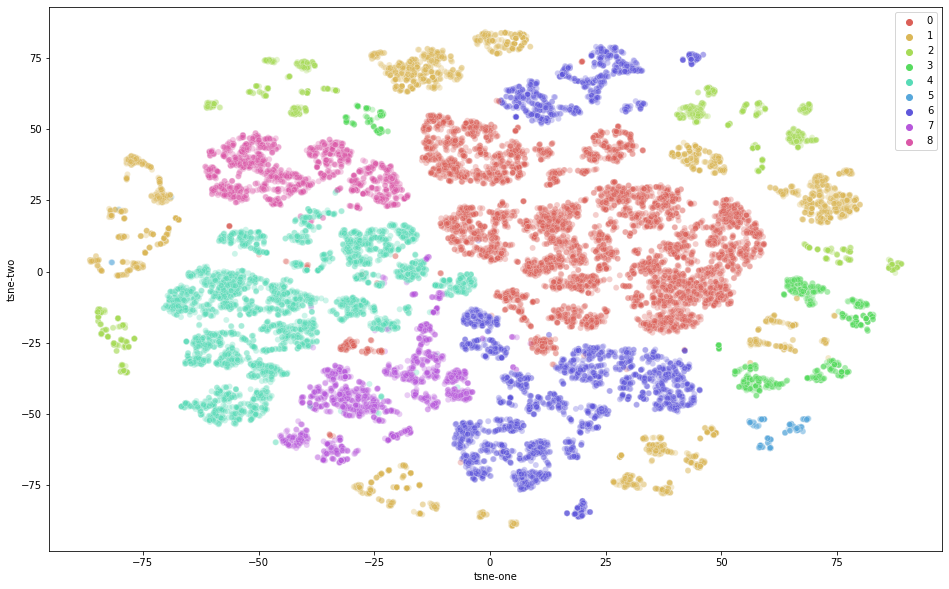

In [11]:
df['tsne-one'] = tsne_result[:,0]
df['tsne-two'] = tsne_result[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue=ac_labels,
    palette=sns.color_palette("hls",9),
    data=df,
    legend="full",
    alpha=0.3)

In [12]:
df.shape

(24583, 66)

In [13]:
ica = FastICA(n_components = 2)
ica_result = ica.fit_transform(df.values)

<AxesSubplot:xlabel='ica-one', ylabel='ica-two'>

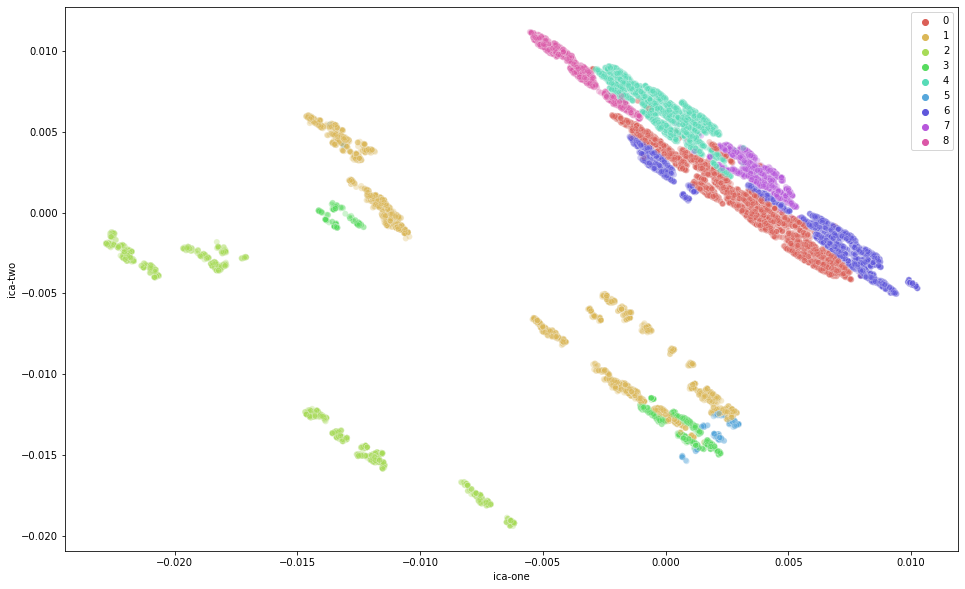

In [14]:
df['ica-one'] = ica_result[:,0]
df['ica-two'] = ica_result[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="ica-one", y="ica-two",
    hue=ac_labels,
    palette=sns.color_palette("hls", 9),
    data=df,
    legend="full",
    alpha=0.3)

array([0.57339102, 0.21162512])

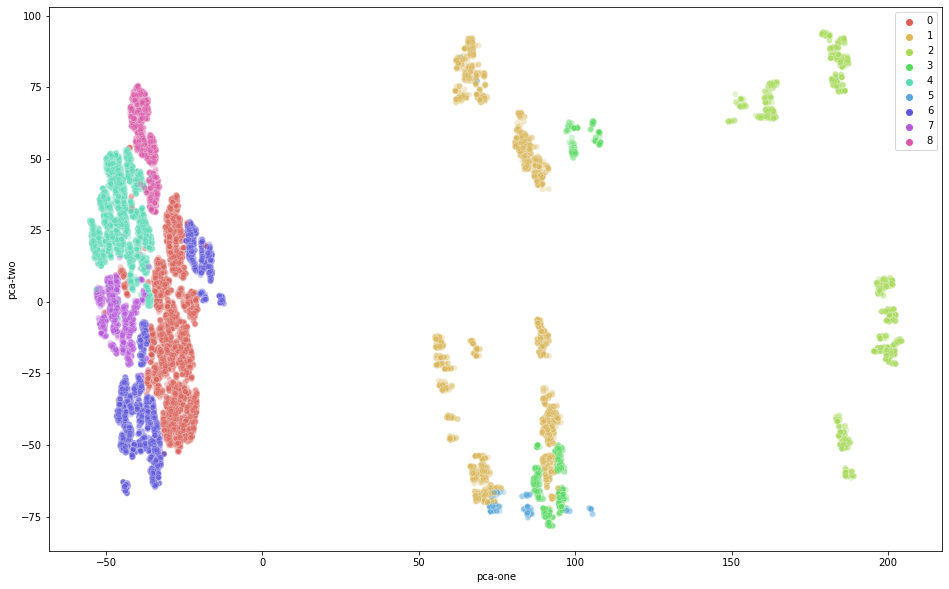

In [15]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=ac_labels,
    palette=sns.color_palette("hls", 9),
    data=df,
    legend="full",
    alpha=0.3)
pca.explained_variance_ratio_

In [16]:
# mds = MDS(n_components = 2, max_iter=100, n_init=1)
# mds_result = mds.fit_transform(df.values)
# df['MDS-one'] = mds_result[:,0]
# df['MDS-two'] = mds_result[:,1]
# plt.figure(figsize=(16,10))
# sns.scatterplot(
#     x="MDS-one", y="MDS-two",
#     hue=ac_labels,
#     palette=sns.color_palette("hls", 9),
#     data=df,
#     legend="full",
#     alpha=0.3)

In [17]:
LLE = LocallyLinearEmbedding(n_neighbors = 12, n_components = 2, eigen_solver='auto', method='standard')
LLE_result = LLE.fit_transform(df.values)
df['LLE-one'] = LLE_result[:,0]
df['LLE-two'] = LLE_result[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="LLE-one", y="LLE-two",
    hue=ac_labels,
    palette=sns.color_palette("hls", 9),
    data=df,
    legend="full",
    alpha=0.3)

ValueError: Error in determining null-space with ARPACK. Error message: 'Factor is exactly singular'. Note that method='arpack' can fail when the weight matrix is singular or otherwise ill-behaved.  method='dense' is recommended. See online documentation for more information.

C:\Users\nogae\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


<AxesSubplot:xlabel='lem-one', ylabel='lem-two'>

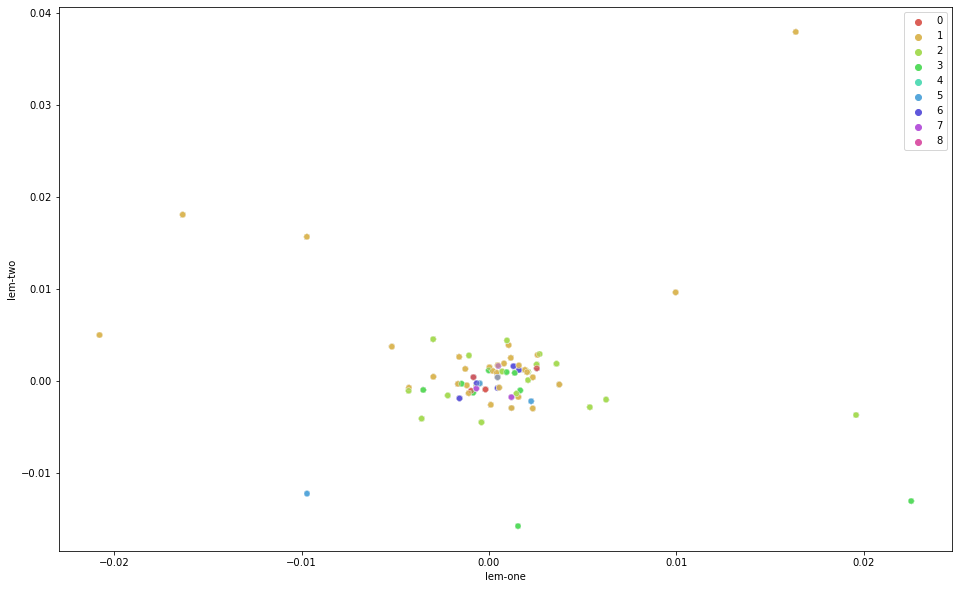

In [18]:
lem = SpectralEmbedding(n_neighbors = 12,n_components = 2)
lem_result = lem.fit_transform(df.values)
df['lem-one'] = lem_result[:,0]
df['lem-two'] = lem_result[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="lem-one", y="lem-two",
    hue=ac_labels,
    palette=sns.color_palette("hls", 9),
    data=df,
    legend="full",
    alpha=0.3)

In [ ]:
df.shape

In [19]:
df = pd.read_csv('USCensus1990.data.csv')
partial_df = df.sample(frac=0.01)
df = partial_df
del(df['caseid'],df['dAge'],df['dHispanic'],df['iYearwrk'],df['iSex'])

In [20]:
kmeans_silhoutte = []
for i in range(2,15):
    kmeans = KMeans(n_clusters=i).fit(df.values)
    kmeans_labels = kmeans.labels_
    silhouette_avg = silhouette_score(df[df.columns.values].values, kmeans_labels)
    kmeans_silhoutte.append(silhouette_avg)
    print(
                "For n_clusters =",
                i,
                "The average silhouette_score is :",
                silhouette_avg,
        )
    unique_counts = np.unique(kmeans_labels,return_counts=True)
    print(unique_counts)


For n_clusters = 2 The average silhouette_score is : 0.8083722146876546
(array([0, 1]), array([ 6143, 18440], dtype=int64))
For n_clusters = 3 The average silhouette_score is : 0.8316055118079769
(array([0, 1, 2]), array([18440,  4649,  1494], dtype=int64))
For n_clusters = 4 The average silhouette_score is : 0.6430541208768475
(array([0, 1, 2, 3]), array([16689,  4649,  1494,  1751], dtype=int64))
For n_clusters = 5 The average silhouette_score is : 0.4190674898986005
(array([0, 1, 2, 3, 4]), array([10669,  4649,  1494,  1741,  6030], dtype=int64))
For n_clusters = 6 The average silhouette_score is : 0.3934618097590907
(array([0, 1, 2, 3, 4, 5]), array([6691, 1494, 1741, 4649, 6030, 3978], dtype=int64))
For n_clusters = 7 The average silhouette_score is : 0.35435056270046095
(array([0, 1, 2, 3, 4, 5, 6]), array([3962,  191, 1494, 4458, 6030, 1741, 6707], dtype=int64))
For n_clusters = 8 The average silhouette_score is : 0.3639162669155531
(array([0, 1, 2, 3, 4, 5, 6, 7]), array([4458,

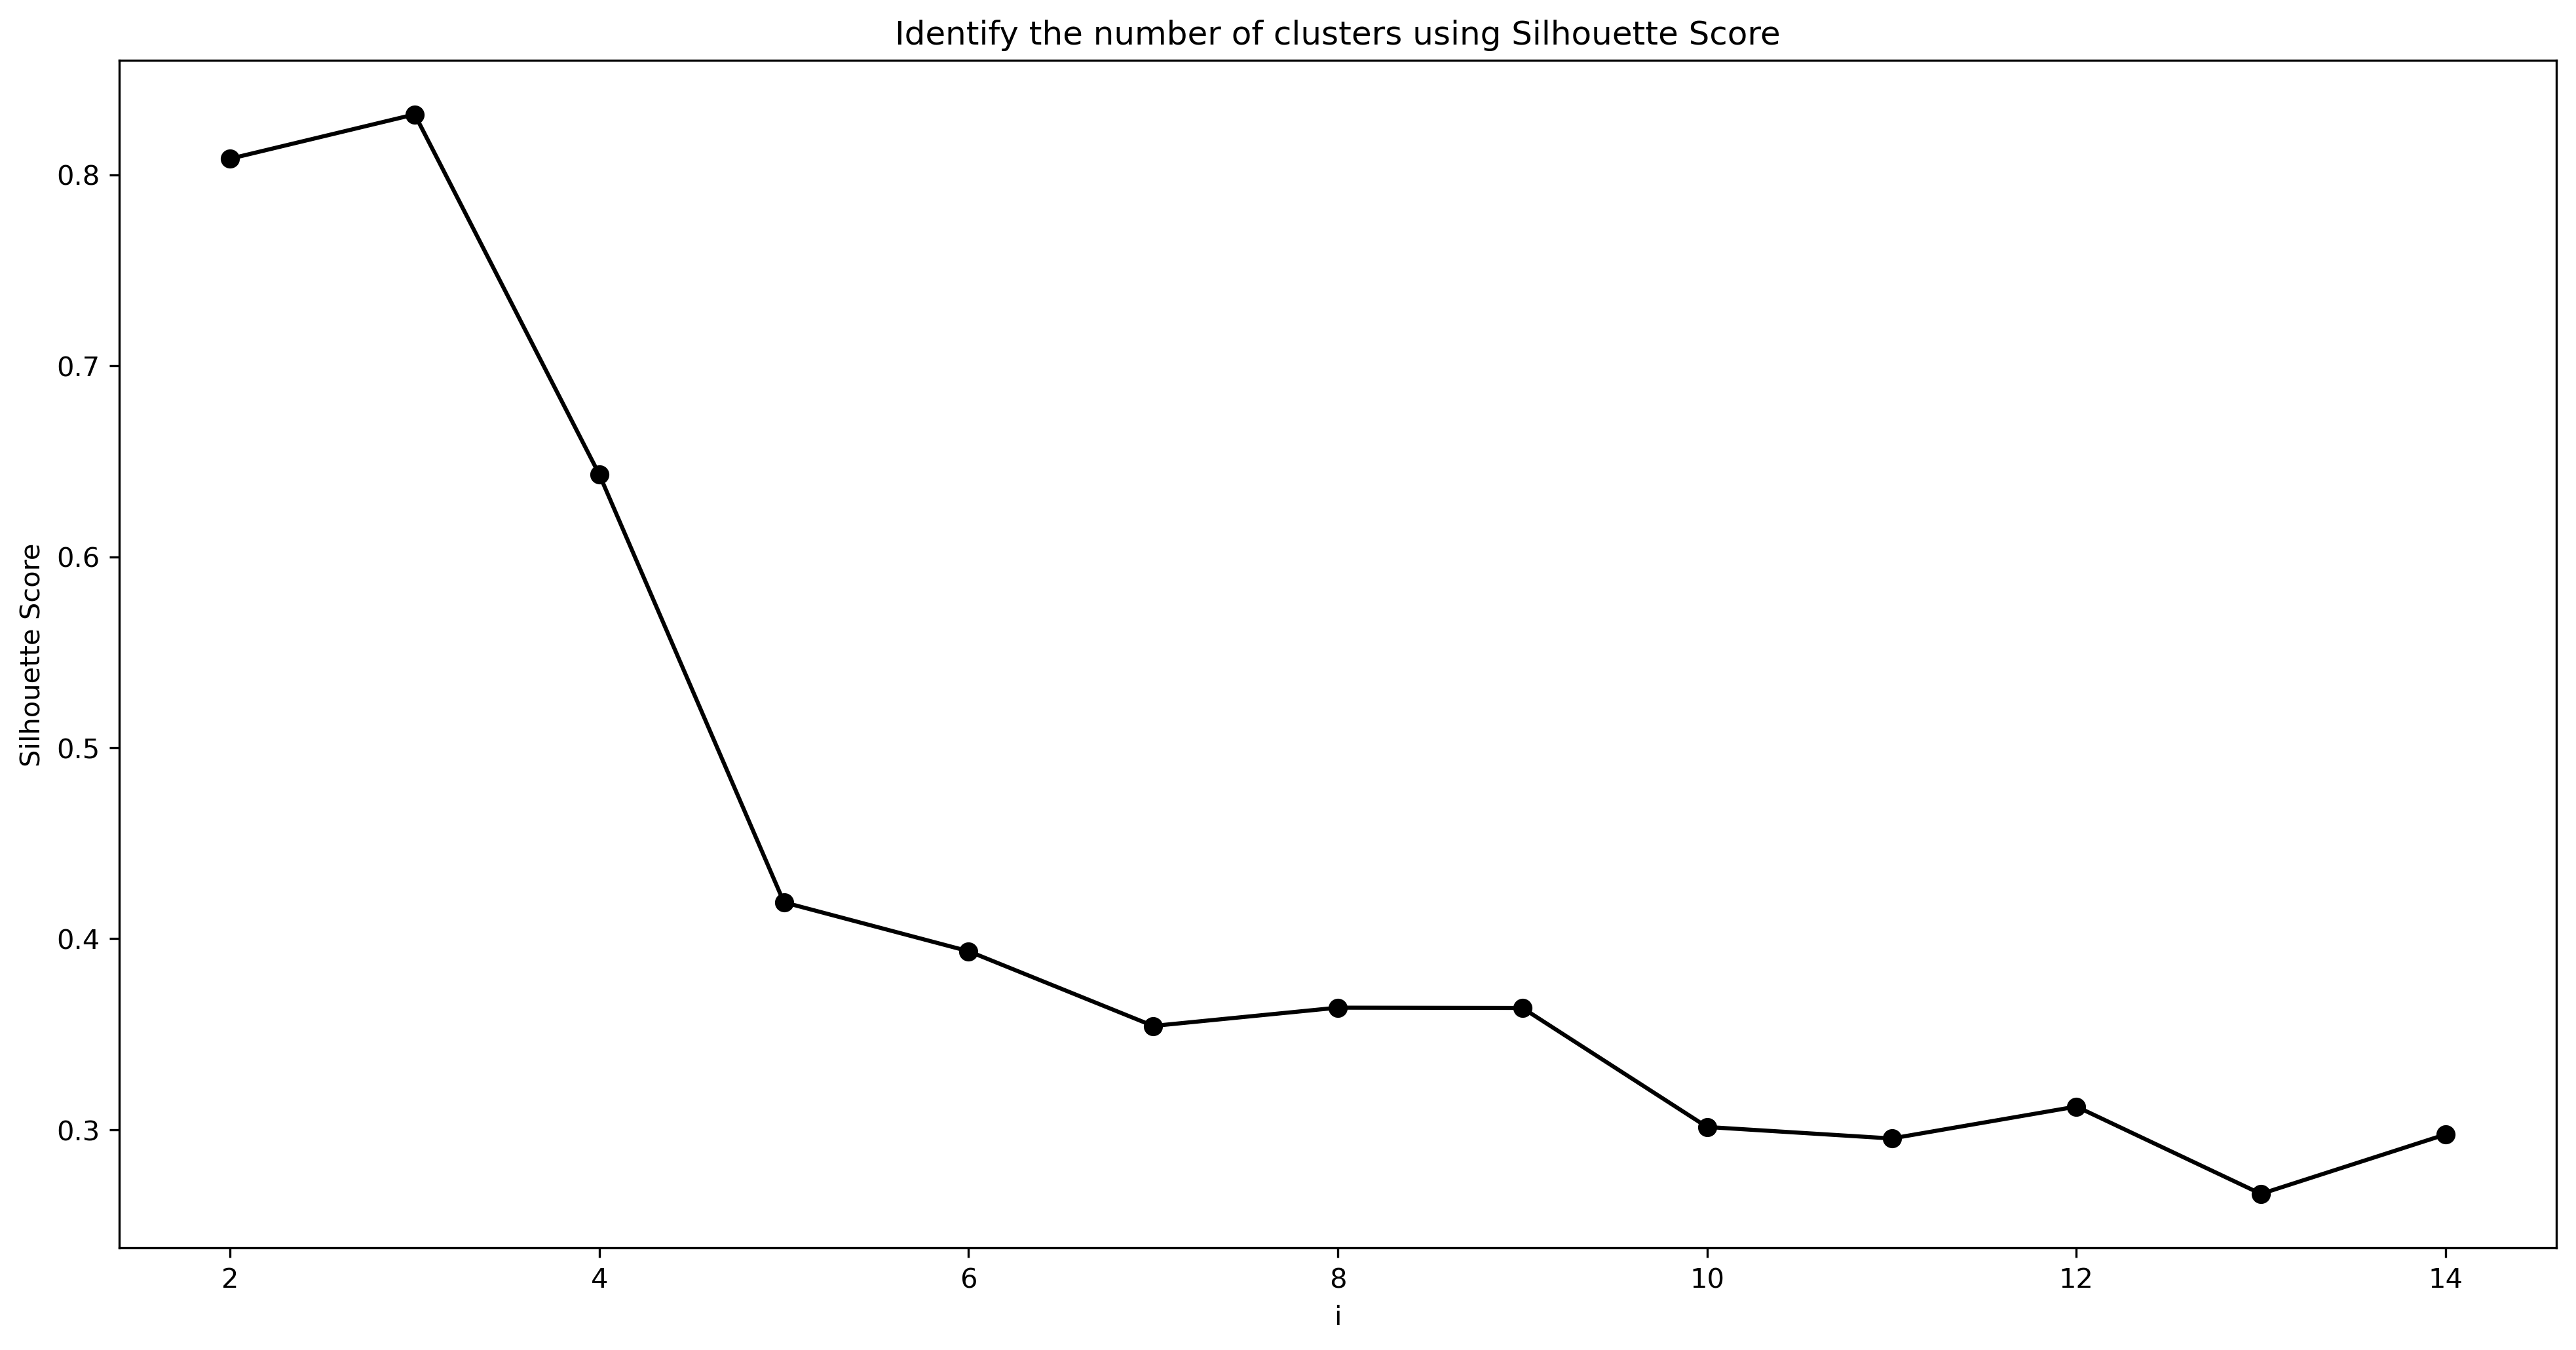

In [21]:
i = [2,3,4,5,6,7,8,9,10,11,12,13,14]
plt.figure(figsize=(16,8), dpi=300)
plt.plot(i, kmeans_silhoutte, 'bo-', color='black')
plt.xlabel('i')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

In [22]:
kmeans = KMeans(n_clusters=7).fit(df.values)
kmeans_labels = kmeans.labels_

<AxesSubplot:xlabel='tsne-one', ylabel='tsne-two'>

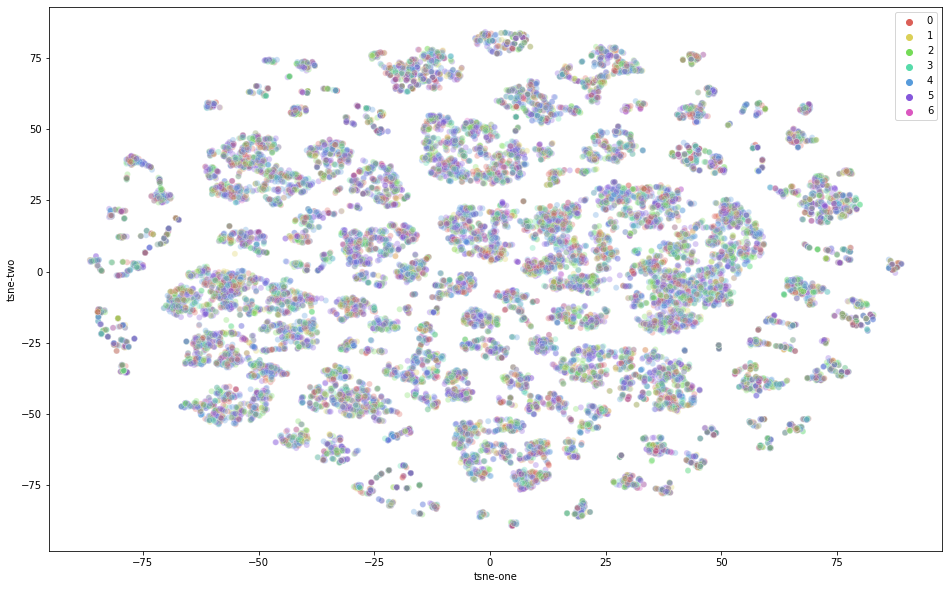

In [23]:
partial_df['tsne-one'] = tsne_result[:,0]
partial_df['tsne-two'] = tsne_result[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue=kmeans_labels,
    palette=sns.color_palette("hls",7),
    data=partial_df,
    legend="full",
    alpha=0.3)

In [ ]:
df

In [ ]:
# for i in range(2,15):
#     fcm = FCM(n_clusters=i).fit(df.values)
#     fcm_labels = fcm.predict(df.values)
#     silhouette_avg = silhouette_score(df[df.columns.values].values, fcm_labels)
#     FCM_silhoutte.append(silhouette_avg)
#     print(
#                 "For n_clusters =",
#                 i,
#                 "The average silhouette_score is :",
#                 silhouette_avg,
#         )
#     unique_counts = np.unique(fcm_labels,return_counts=True)
#     print(unique_counts)

In [24]:
gmm_silhoutte = []
for i in range(2,15):
    gmm = GaussianMixture(n_components=i).fit(df.values)
    gmm_labels = gmm.predict(df.values)
    silhouette_avg = silhouette_score(df[df.columns.values].values, gmm_labels)
    gmm_silhoutte.append(silhouette_avg)
    print(
                "For n_clusters =",
                i,
                "The average silhouette_score is :",
                silhouette_avg,
        )
    unique_counts = np.unique(gmm_labels,return_counts=True)
    print(unique_counts)

For n_clusters = 2 The average silhouette_score is : 0.5006671074797061
(array([0, 1], dtype=int64), array([ 6143, 18440], dtype=int64))
For n_clusters = 3 The average silhouette_score is : 0.10412126349560073
(array([0, 1, 2], dtype=int64), array([15992,  6143,  2448], dtype=int64))
For n_clusters = 4 The average silhouette_score is : 0.0235254094621675
(array([0, 1, 2, 3], dtype=int64), array([15260,  3045,  1097,  5181], dtype=int64))
For n_clusters = 5 The average silhouette_score is : 0.027177120338636684
(array([0, 1, 2, 3, 4], dtype=int64), array([  124,  3722, 14718,  5367,   652], dtype=int64))
For n_clusters = 6 The average silhouette_score is : -0.009204042930948196
(array([0, 1, 2, 3, 4, 5], dtype=int64), array([  757,  3153, 13663,   455,  1624,  4931], dtype=int64))
For n_clusters = 7 The average silhouette_score is : -0.01497594961608204
(array([0, 1, 2, 3, 4, 5, 6], dtype=int64), array([14814,   455,  4931,   418,  1317,  1891,   757], dtype=int64))
For n_clusters = 8 T

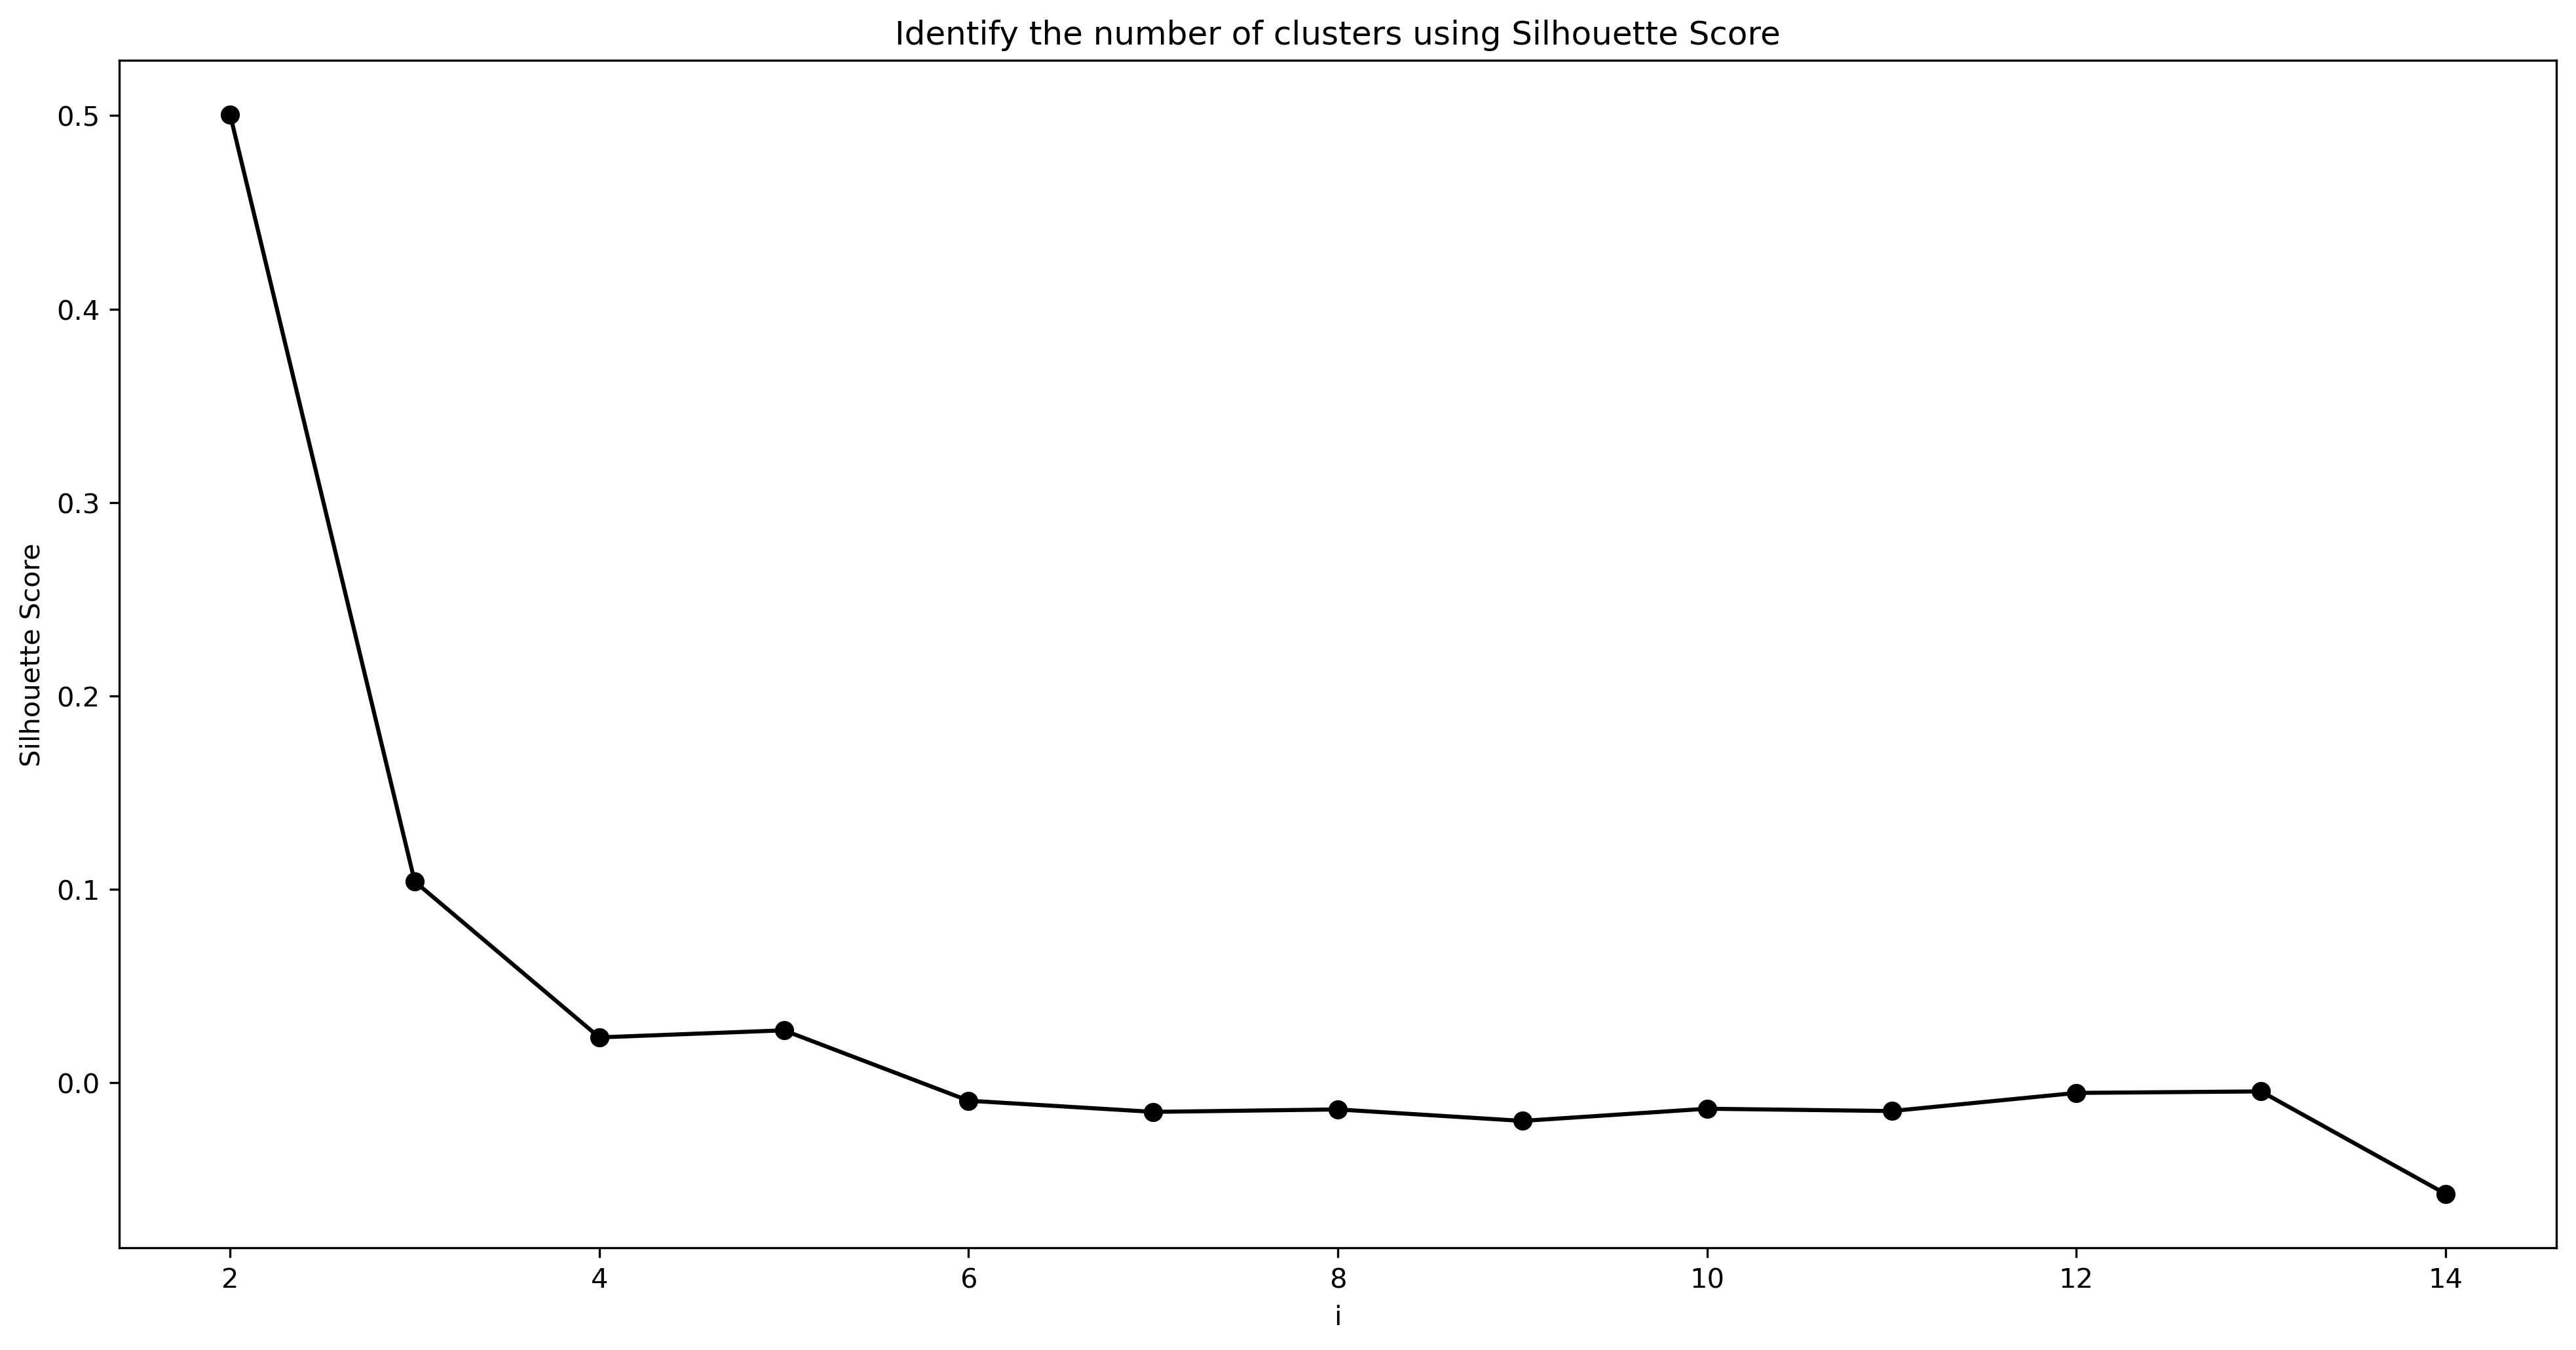

In [25]:
i = [2,3,4,5,6,7,8,9,10,11,12,13,14]
plt.figure(figsize=(16,8), dpi=300)
plt.plot(i, gmm_silhoutte, 'bo-', color='black')
plt.xlabel('i')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

In [26]:
gmm = GaussianMixture(n_components=4).fit(df.values)
gmm_labels = gmm.predict(df.values)

In [ ]:
df

<AxesSubplot:xlabel='tsne-one', ylabel='tsne-two'>

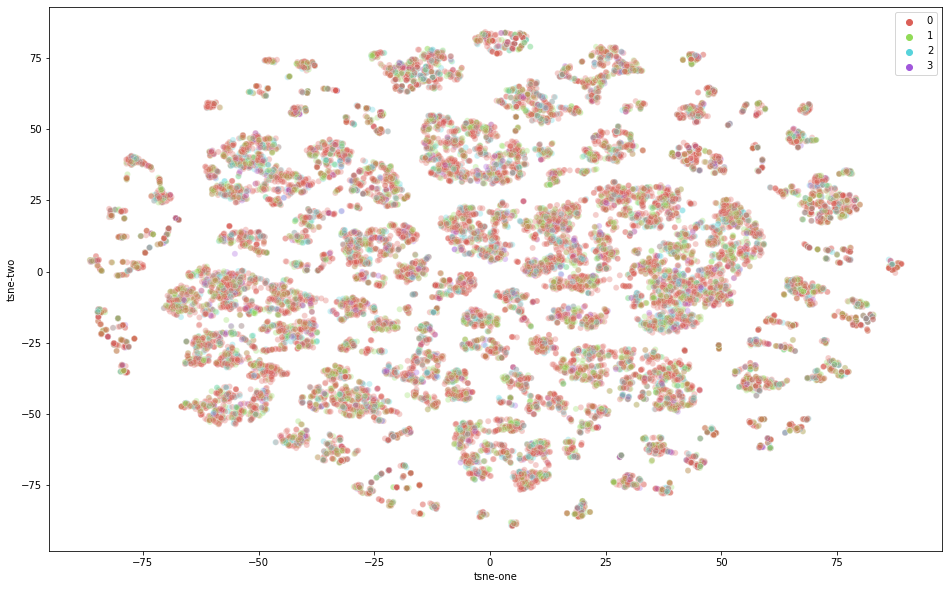

In [27]:
df['tsne-one'] = tsne_result[:,0]
df['tsne-two'] = tsne_result[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue=gmm_labels,
    palette=sns.color_palette("hls",4),
    data=df,
    legend="full",
    alpha=0.3)